# Module 2 Project

## Main Question: 

## Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

### Null Hypothesis: discounts have no effect on the # of products that customer's order

### Alternate Hypothesis: discounts increase the # of products that customer's order

We need to compare 2 groups of data:

-# of each product sold when there was NO discount being applied
-# of each product sold when there was a discount being applied

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Getting The Right Info

In [2]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker

engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()

In [3]:
from sqlalchemy import inspect

inspector = inspect(engine)

# Get names of tables in database
print(inspector.get_table_names())

2019-06-28 23:25:45,102 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-06-28 23:25:45,107 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,111 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-06-28 23:25:45,114 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,119 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-06-28 23:25:45,120 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [4]:
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base

metadata = MetaData()

metadata.reflect(engine)

Base = automap_base(metadata=metadata)

Base.prepare()

2019-06-28 23:25:45,143 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-06-28 23:25:45,145 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,148 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-06-28 23:25:45,150 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,153 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-06-28 23:25:45,155 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,158 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-06-28 23:25:45,160 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,161 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-06-28 23:25:45,163 INFO sqlalchemy.engine.base.Engin

2019-06-28 23:25:45,312 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-06-28 23:25:45,313 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,314 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-06-28 23:25:45,316 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,317 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-06-28 23:25:45,318 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,320 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-06-28 23:25:45,321 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,322 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-06-28 23:25:45,323 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,324 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-06-28 23:25:45,429 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-06-28 23:25:45,430 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,433 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-06-28 23:25:45,434 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,436 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-06-28 23:25:45,437 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,439 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-06-28 23:25:45,440 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,441 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-06-28 23:25:45,442 INFO sqlalchemy.engine.base.Engine ()
2019-06-28 23:25:45,443 INFO 

In [5]:
Orders = Base.classes.Order
Order_Details = Base.classes.OrderDetail
Products = Base.classes.Product
Customers = Base.classes.Customer

In [6]:
print(inspector.get_columns('Product'))

2019-06-28 23:25:45,536 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Product")
2019-06-28 23:25:45,538 INFO sqlalchemy.engine.base.Engine ()
[{'name': 'Id', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'ProductName', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'SupplierId', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'CategoryId', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'QuantityPerUnit', 'type': VARCHAR(length=8000), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'UnitPrice', 'type': DECIMAL(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'UnitsInStock', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'aut

In [7]:
query = """
Select p.ProductName, COUNT(*) num_orders, o.Discount from [OrderDetail] o JOIN [Product] p on o.ProductID = p.Id
Group By o.ProductID Order By num_orders DESC
"""
df = pd.read_sql_query(query, engine)
df.head()

2019-06-28 23:25:45,557 INFO sqlalchemy.engine.base.Engine 
Select p.ProductName, COUNT(*) num_orders, o.Discount from [OrderDetail] o JOIN [Product] p on o.ProductID = p.Id
Group By o.ProductID Order By num_orders DESC

2019-06-28 23:25:45,558 INFO sqlalchemy.engine.base.Engine ()


,ProductName,num_orders,Discount
0,Raclette Courdavault,54,0.00
1,Guaraná Fantástica,51,0.15
2,Gorgonzola Telino,51,0.00
3,Camembert Pierrot,51,0.00
4,Gnocchi di nonna Alice,50,0.00


In [8]:
df = pd.read_sql_query("Select ProductId, COUNT(*) num_orders from OrderDetail group by ProductId order by num_orders DESC", engine)
df.head()

2019-06-28 23:25:45,618 INFO sqlalchemy.engine.base.Engine Select ProductId, COUNT(*) num_orders from OrderDetail group by ProductId order by num_orders DESC
2019-06-28 23:25:45,620 INFO sqlalchemy.engine.base.Engine ()


,ProductId,num_orders
0,59,54
1,24,51
2,31,51
3,60,51
4,56,50


In [9]:
df = pd.read_sql_query("""Select ProductId, COUNT(*) num_orders from OrderDetail
where Discount = 0
group by ProductId order by ProductId
""", engine)
df.head()

2019-06-28 23:25:45,640 INFO sqlalchemy.engine.base.Engine Select ProductId, COUNT(*) num_orders from OrderDetail
where Discount = 0
group by ProductId order by ProductId

2019-06-28 23:25:45,641 INFO sqlalchemy.engine.base.Engine ()


,ProductId,num_orders
0,1,22
1,2,19
2,3,10
3,4,10
4,5,6


In [10]:
df = pd.read_sql_query("""Select ProductId, COUNT(*) num_orders from OrderDetail
where Discount > 0
group by ProductId order by ProductId
""", engine)
df.head()

2019-06-28 23:25:45,668 INFO sqlalchemy.engine.base.Engine Select ProductId, COUNT(*) num_orders from OrderDetail
where Discount > 0
group by ProductId order by ProductId

2019-06-28 23:25:45,670 INFO sqlalchemy.engine.base.Engine ()


,ProductId,num_orders
0,1,16
1,2,25
2,3,2
3,4,10
4,5,4


In [11]:
df = pd.read_sql_query("Select Discount from OrderDetail where ProductId = 1", engine)
df.Discount.value_counts()

2019-06-28 23:25:45,692 INFO sqlalchemy.engine.base.Engine Select Discount from OrderDetail where ProductId = 1
2019-06-28 23:25:45,694 INFO sqlalchemy.engine.base.Engine ()


0.00    22
0.15     5
0.25     5
0.20     4
0.05     1
0.10     1
Name: Discount, dtype: int64

In [12]:
nodiscount_df = pd.read_sql_query("Select ProductId, SUM(Quantity) total from OrderDetail where Discount = 0 group by ProductId", engine)
nodiscount_df.head()

2019-06-28 23:25:45,712 INFO sqlalchemy.engine.base.Engine Select ProductId, SUM(Quantity) total from OrderDetail where Discount = 0 group by ProductId
2019-06-28 23:25:45,714 INFO sqlalchemy.engine.base.Engine ()


,ProductId,total
0,1,391
1,2,408
2,3,288
3,4,172
4,5,176


In [13]:
discount_df = pd.read_sql_query("Select ProductId, SUM(Quantity) total from OrderDetail where Discount > 0 group by ProductId", engine)
discount_df.head()

2019-06-28 23:25:45,735 INFO sqlalchemy.engine.base.Engine Select ProductId, SUM(Quantity) total from OrderDetail where Discount > 0 group by ProductId
2019-06-28 23:25:45,735 INFO sqlalchemy.engine.base.Engine ()


,ProductId,total
0,1,437
1,2,649
2,3,40
3,4,281
4,5,122


## Hypothesis Test begins

In [14]:
nodiscount = np.array(nodiscount_df.total)
discount = np.array(discount_df.total)

In [15]:
difference = discount-nodiscount
difference

array([  46,  241, -248,  109,  -54, -127, -493, -108,   77, -114,  -50,
       -106, -221,  -80,  -48,  224,   58,   15, -115,    5, -144, -296,
       -184, -283,   68,  -61, -335,  -98, -100,  -26,  233,   75, -283,
        -32, -179, -183,   31,  -17,  107,  -41, -217,   55, -170,  151,
         68, -172,  -87,   90, -236, -115,    2, -208, -156, -149,  449,
       -279, -316,  272, -154,   47,  219, -347, -135, -260,   83,  -99,
        -46, -277,  122,  -59, -251, -414,  -61, -155, -107, -201,  -31],
      dtype=int64)

Because we are comparing a change of 0 vs the actual change observed in products sold, discount vs no discount, for each product I think we need to do a 1 sample t-test

Null Hypo: mu = 0
Alt Hypo: mu =! 0 (2-tailed)

In [16]:
mu = 0

In [17]:
x_bar = difference.mean()
x_bar

-76.37662337662337

In [18]:
sigma = np.std(difference, ddof=1)
sigma

169.05885295403075

In [19]:
n = difference.size
dfr = n-1

In [20]:
diff = x_bar - mu

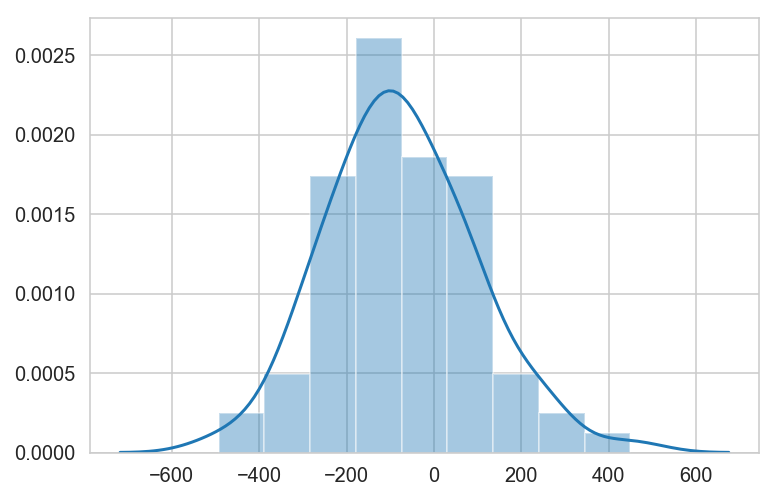

In [21]:
sns.distplot(difference)

In [22]:
results = stats.ttest_1samp(a= difference, popmean= mu)         
print ("The t-value for our sample is", round(results[0], 2), "and the p-value is", np.round((results[1]), 4))

The t-value for our sample is -3.96 and the p-value is 0.0002


In [23]:
t_crit = np.round(stats.t.ppf(1 - 0.025, df=dfr),3)
t_crit

1.992

Our t-critical value for this 2-tailed test is plus or minus 1.992.  Since our t-value of -3.96 is less than -1.992 we reject the null hypothesis that discounts have no significant effect on product sales.  And our negative t-value tells us that we actually saw, in the data, statistically significant evidence that discounts led to less raw sale numbers

## 2nd Hypothesis




Younger vs Older employees sales numbers

In [48]:
df = pd.read_sql_query("""
Select o.Id OrderId, o.EmployeeId, o.OrderDate, e.LastName, e.FirstName, e.BirthDate, count(*) num_orders from [Order] o JOIN Employee e
on o.EmployeeId = e.Id where o.OrderDate between '2013-01-01' and '2015-01-01' group by o.EmployeeId
order by e.Birthdate
""", engine)
df

2019-07-01 23:10:04,088 INFO sqlalchemy.engine.base.Engine 
Select o.Id OrderId, o.EmployeeId, o.OrderDate, e.LastName, e.FirstName, e.BirthDate, count(*) num_orders from [Order] o JOIN Employee e
on o.EmployeeId = e.Id where o.OrderDate between '2013-01-01' and '2015-01-01' group by o.EmployeeId
order by e.Birthdate

2019-07-01 23:10:04,089 INFO sqlalchemy.engine.base.Engine ()


,OrderId,EmployeeId,OrderDate,LastName,FirstName,BirthDate,num_orders
0,10403,4,2013-01-03,Peacock,Margaret,1969-09-19,125
1,10400,1,2013-01-01,Davolio,Nancy,1980-12-08,97
2,10404,2,2013-01-03,Fuller,Andrew,1984-02-19,80
3,10463,5,2013-03-04,Buchanan,Steven,1987-03-04,31
4,10402,8,2013-01-02,Callahan,Laura,1990-01-09,85
5,10406,7,2013-01-07,King,Robert,1992-05-29,61
6,10423,6,2013-01-23,Suyama,Michael,1995-07-02,52
7,10409,3,2013-01-09,Leverling,Janet,1995-08-30,109
8,10411,9,2013-01-10,Dodsworth,Anne,1998-01-27,38


I want to hypothesize about sales prowess between younger vs older employees.  

Is there a statistically significant difference between sales rates of the lower 50 percentile of employees vs the upper 50 percentile of employees (age)?  This test measures over a 2 year period.  We are using raw number of orders as the measure of sales in this test

Null Hypo: no difference between sales rates of older vs younger sales employees
Alternative: there is a statistically difference between the two

In [66]:
young = np.array(df.num_orders.iloc[0:5])
old = np.array(df.num_orders.iloc[4:])

In [67]:
young

array([125,  97,  80,  31,  85], dtype=int64)

In [68]:
old

array([ 85,  61,  52, 109,  38], dtype=int64)

In [90]:
young.mean(), old.mean()

(83.6, 69.0)

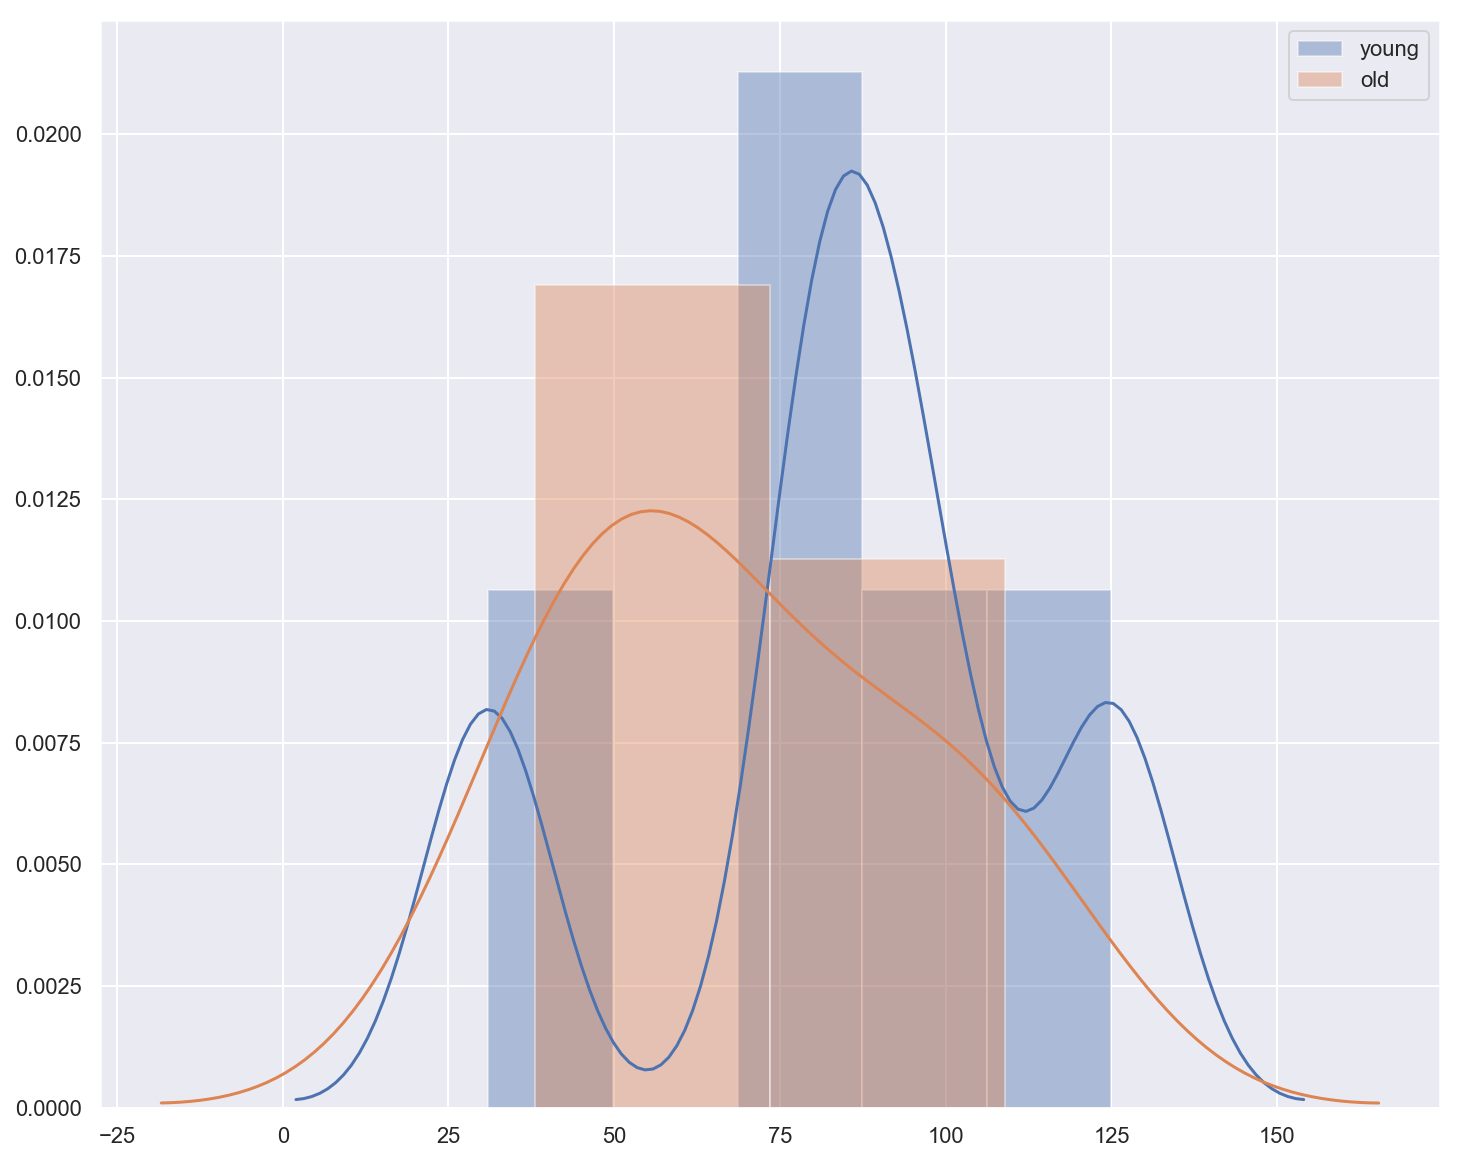

In [76]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(young, label='young') # Blue distribution
sns.distplot(old, label='old') # Green distribution
plt.legend()

In [79]:
old.var(), young.var()

(634.0, 935.04)

The normality is not good and the variances are very different.  I think we should use the Welch's t-test instead of the Student's t-test

In [80]:
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return numerator/denominator

In [85]:
t_2 = welch_t(young,old)
t_2

0.7371669294220118

In [88]:
def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t_stat, color='black', linestyle='--', lw=5)
    ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

    plt.show()
    return None

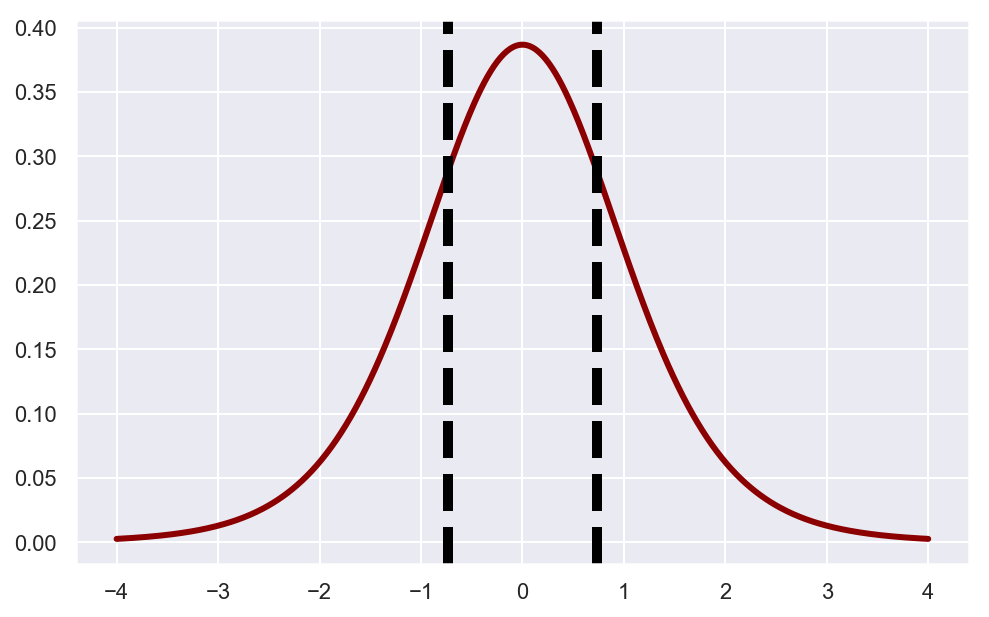

In [89]:
visualize_t(t_2, len(young), len(old))

In [82]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

In [86]:
df_2 = welch_df(young,old)
df_2

7.715965775869114

In [92]:
t_crit_2 = np.round(stats.t.ppf(1 - 0.025, df=df_2),3)
t_crit_2

2.321

In [87]:
stats.t.sf(abs(t_2),df_2) * 2

0.48283111367470477

The p-value for our t-statistic of .737 is .483.  This is greater than our alpha of.05 so we cannot reject the null hypothesis.
We are 95% sure there is no major difference in sales prowess by difference in age based on our samples

In [97]:
stats.ttest_ind(young,old, equal_var=False)

Ttest_indResult(statistic=0.7371669294220118, pvalue=0.48283111367470477)

## Third Hypothesis

Is the average order amount (in $) greater when the sales employee is located in the same country as the buyer?

In [184]:
df = pd.read_sql_query("""
Select d.UnitPrice, d.Quantity, d.Discount, o.Id OrderId, 
o.ShipCountry CustomerCountry, e.Country EmployeeCountry
from [Order] o  join Employee e on o.EmployeeId = e.Id 
join OrderDetail d on d.OrderId = o.Id
where o.ShipCountry = e.Country
""", engine)
df

2019-07-04 00:26:58,820 INFO sqlalchemy.engine.base.Engine 
Select d.UnitPrice, d.Quantity, d.Discount, o.Id OrderId, 
o.ShipCountry CustomerCountry, e.Country EmployeeCountry
from [Order] o  join Employee e on o.EmployeeId = e.Id 
join OrderDetail d on d.OrderId = o.Id
where o.ShipCountry = e.Country

2019-07-04 00:26:58,824 INFO sqlalchemy.engine.base.Engine ()


,UnitPrice,Quantity,Discount,OrderId,CustomerCountry,EmployeeCountry
0,17.00,12,0.20,10262,USA,USA
1,24.00,15,0.00,10262,USA,USA
2,30.40,2,0.00,10262,USA,USA
3,8.00,30,0.00,10289,UK,UK
4,26.60,9,0.00,10289,UK,UK
5,14.40,18,0.00,10294,USA,USA
6,31.20,15,0.00,10294,USA,USA
7,36.80,15,0.00,10294,USA,USA
8,27.20,21,0.00,10294,USA,USA
9,6.20,6,0.00,10294,USA,USA


In [185]:
df['TotalMoney'] = round(df.UnitPrice * df.Quantity * (1-df.Discount),3)

In [186]:
same_country = np.array(df.groupby('OrderId', as_index=False)['TotalMoney'].sum()['TotalMoney'])
same_country

array([  584.   ,   479.4  ,  1887.6  ,  3741.3  ,   424.   ,   336.   ,
        2094.3  ,  2835.   ,  4578.43 ,   934.5  ,  2296.   ,  1618.88 ,
         480.   ,  3471.68 ,  2390.4  ,   338.   ,   691.2  ,  2556.95 ,
         442.   ,  2505.6  ,  3868.6  ,   102.4  ,   485.   ,  4924.135,
        1755.   ,  2018.5  ,   956.675, 10495.6  ,   147.   ,  1388.5  ,
        2444.31 ,   796.35 ,   139.8  ,   355.5  ,   417.2  ,   210.   ,
        1234.05 ,   764.3  ,   317.75 ,    72.   ,   565.5  ,  1180.88 ,
        2388.5  ,   493.   ,   479.8  ,  1483.   ,  6375.   ,  4807.   ,
        1402.5  ,  1393.24 ,  1185.75 ,  4371.6  ,  1701.   ,   125.   ,
        1295.   ,  1261.875,  1287.4  ,  2071.2  ,   996.   ,  1638.4  ,
        1893.   ,  2827.9  ,   844.252,  1570.   ,   468.45 ,  1416.   ,
        2196.   ,  1990.   ,  2278.4  ,  2775.   ,  1411.   ,    40.   ,
        8446.45 ,  1140.   ,   678.   ,  1764.   ,  4931.92 ,   931.5  ,
        2984.   ,  2227.888,  3523.4  ,  1630.   , 

In [187]:
same_country[1]

479.4

In [188]:
df = pd.read_sql_query("""
Select d.UnitPrice, d.Quantity, d.Discount, o.Id OrderId, 
o.ShipCountry CustomerCountry, e.Country EmployeeCountry
from [Order] o  join Employee e on o.EmployeeId = e.Id 
join OrderDetail d on d.OrderId = o.Id
where o.ShipCountry != e.Country
""", engine)
df

2019-07-04 00:27:00,669 INFO sqlalchemy.engine.base.Engine 
Select d.UnitPrice, d.Quantity, d.Discount, o.Id OrderId, 
o.ShipCountry CustomerCountry, e.Country EmployeeCountry
from [Order] o  join Employee e on o.EmployeeId = e.Id 
join OrderDetail d on d.OrderId = o.Id
where o.ShipCountry != e.Country

2019-07-04 00:27:00,669 INFO sqlalchemy.engine.base.Engine ()


,UnitPrice,Quantity,Discount,OrderId,CustomerCountry,EmployeeCountry
0,14.00,12,0.00,10248,France,UK
1,9.80,10,0.00,10248,France,UK
2,34.80,5,0.00,10248,France,UK
3,18.60,9,0.00,10249,Germany,UK
4,42.40,40,0.00,10249,Germany,UK
5,7.70,10,0.00,10250,Brazil,USA
6,42.40,35,0.15,10250,Brazil,USA
7,16.80,15,0.15,10250,Brazil,USA
8,16.80,6,0.05,10251,France,USA
9,15.60,15,0.05,10251,France,USA


In [189]:
df['TotalMoney'] = round(df.UnitPrice * df.Quantity * (1-df.Discount),3)
df.head()

,UnitPrice,Quantity,Discount,OrderId,CustomerCountry,EmployeeCountry,TotalMoney
0,14.0,12,0.0,10248,France,UK,168.0
1,9.8,10,0.0,10248,France,UK,98.0
2,34.8,5,0.0,10248,France,UK,174.0
3,18.6,9,0.0,10249,Germany,UK,167.4
4,42.4,40,0.0,10249,Germany,UK,1696.0


In [190]:
diff_country = np.array(df.groupby('OrderId', as_index=False)['TotalMoney'].sum()['TotalMoney'])
diff_country

array([4.4000000e+02, 1.8634000e+03, 1.5526000e+03, 6.5406000e+02,
       3.5979000e+03, 1.4448000e+03, 5.5662000e+02, 2.4905000e+03,
       5.1780000e+02, 1.1199000e+03, 1.6148800e+03, 1.0080000e+02,
       1.5046500e+03, 4.4800000e+02, 1.8738000e+03, 6.9562500e+02,
       1.1760000e+03, 3.4656000e+02, 3.5366000e+03, 1.1012000e+03,
       6.4220000e+02, 1.3760000e+03, 4.8000000e+01, 1.4560000e+03,
       2.0372800e+03, 5.3860000e+02, 2.9184000e+02, 4.2000000e+02,
       1.2008000e+03, 1.4888000e+03, 3.5100000e+02, 6.1320000e+02,
       8.6500000e+01, 1.5540000e+02, 1.4148000e+03, 1.1703750e+03,
       1.7433600e+03, 3.0160000e+03, 8.1900000e+02, 8.0100000e+01,
       2.1690000e+03, 4.9752000e+02, 1.2960000e+03, 8.4870000e+02,
       1.2160000e+02, 1.0506000e+03, 1.4200000e+03, 2.6450000e+03,
       3.4950000e+02, 6.0800000e+02, 7.5500000e+02, 2.7088000e+03,
       1.1178000e+03, 9.5440000e+02, 4.9850000e+02, 8.8800000e+01,
       1.7620000e+03, 2.6880000e+02, 1.6148000e+03, 1.8240000e

In [191]:
len(same_country), len(diff_country)

(108, 722)

In [192]:
diff_country[1]

1863.4

In [193]:
same_country.var(), diff_country.var()

(3323496.340787814, 3399926.986871448)

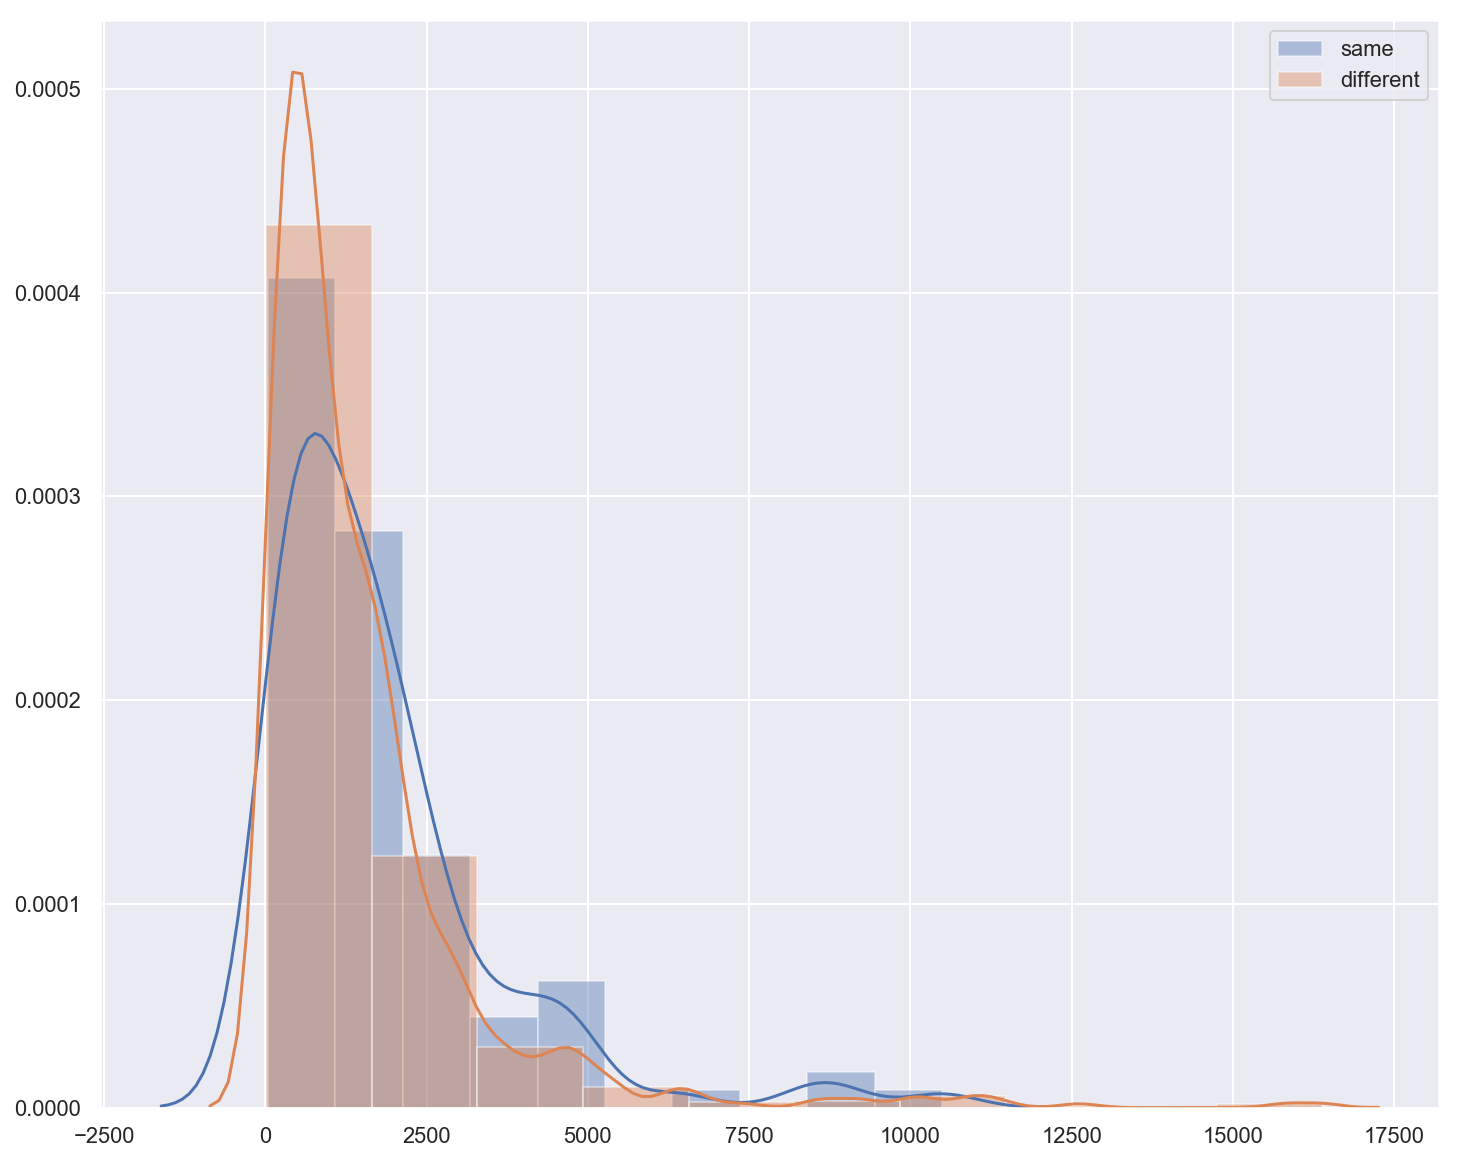

In [155]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(same_country, bins=10, label='same') # Blue distribution
sns.distplot(diff_country, bins=10, label='different') # Green distribution
plt.legend()

The data is pretty normal except for outliers to the positive side of each.  I think it may be smart to cutoff the data at a certain point to make sure our data is normal so the t-test will be reliable

In [195]:
same_country = same_country[same_country<5500]
same_country

array([ 584.   ,  479.4  , 1887.6  , 3741.3  ,  424.   ,  336.   ,
       2094.3  , 2835.   , 4578.43 ,  934.5  , 2296.   , 1618.88 ,
        480.   , 3471.68 , 2390.4  ,  338.   ,  691.2  , 2556.95 ,
        442.   , 2505.6  , 3868.6  ,  102.4  ,  485.   , 4924.135,
       1755.   , 2018.5  ,  956.675,  147.   , 1388.5  , 2444.31 ,
        796.35 ,  139.8  ,  355.5  ,  417.2  ,  210.   , 1234.05 ,
        764.3  ,  317.75 ,   72.   ,  565.5  , 1180.88 , 2388.5  ,
        493.   ,  479.8  , 1483.   , 4807.   , 1402.5  , 1393.24 ,
       1185.75 , 4371.6  , 1701.   ,  125.   , 1295.   , 1261.875,
       1287.4  , 2071.2  ,  996.   , 1638.4  , 1893.   , 2827.9  ,
        844.252, 1570.   ,  468.45 , 1416.   , 2196.   , 1990.   ,
       2278.4  , 2775.   , 1411.   ,   40.   , 1140.   ,  678.   ,
       1764.   , 4931.92 ,  931.5  , 2984.   , 2227.888, 3523.4  ,
       1630.   ,  892.64 ,   36.   , 1378.07 , 2753.1  , 1924.25 ,
        920.6  ,  456.   , 4441.25 ,  439.   ,  720.9  , 1809.

In [194]:
diff_country = diff_country[diff_country<5500]
diff_country

array([ 440.   , 1863.4  , 1552.6  ,  654.06 , 3597.9  , 1444.8  ,
        556.62 , 2490.5  ,  517.8  , 1119.9  , 1614.88 ,  100.8  ,
       1504.65 ,  448.   , 1873.8  ,  695.625, 1176.   ,  346.56 ,
       3536.6  , 1101.2  ,  642.2  , 1376.   ,   48.   , 1456.   ,
       2037.28 ,  538.6  ,  291.84 ,  420.   , 1200.8  , 1488.8  ,
        351.   ,  613.2  ,   86.5  ,  155.4  , 1414.8  , 1170.375,
       1743.36 , 3016.   ,  819.   ,   80.1  , 2169.   ,  497.52 ,
       1296.   ,  848.7  ,  121.6  , 1050.6  , 1420.   , 2645.   ,
        349.5  ,  608.   ,  755.   , 2708.8  , 1117.8  ,  954.4  ,
        498.5  ,   88.8  , 1762.   ,  268.8  , 1614.8  ,  182.4  ,
        516.8  ,  288.   ,  240.4  , 1191.2  ,  516.   ,  144.   ,
        112.   ,  164.4  , 5275.715, 1497.   ,  982.   , 1810.   ,
       1168.   , 1649.   ,   88.5  , 1786.88 ,  877.2  ,  144.8  ,
       2036.16 ,  285.12 , 2467.   , 3354.   , 2436.18 ,  352.6  ,
       1840.64 , 1584.   , 2924.8  ,  814.42 ,  363.6  ,  141.

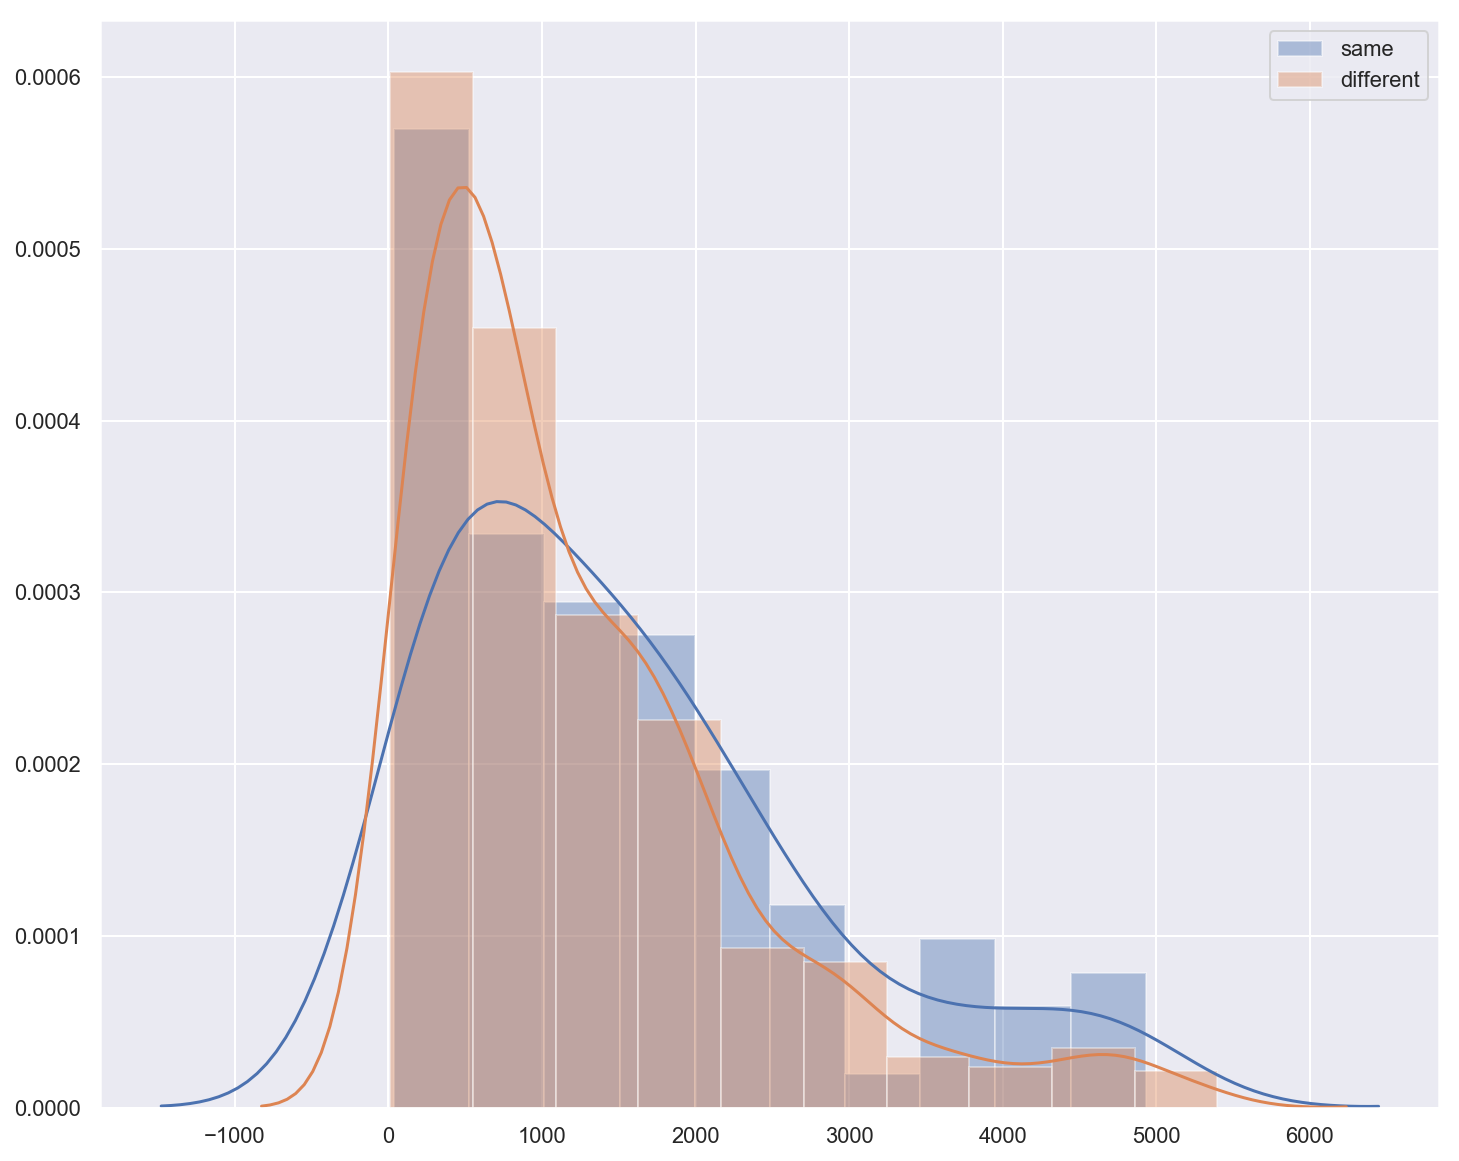

In [196]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(same_country, bins=10, label='same') # Blue distribution
sns.distplot(diff_country, bins=10, label='different') # Green distribution
plt.legend()

Null Hypo: no difference in average sale (price) between items sold to customer where both are located in same country vs where both are located in different countries

Alt Hypo: there is a difference (in either direction)

Let's see how the variances of each sample compare to eachother to know what type of t-test to use (student's vs. welch)

In [197]:
same_country.var() , diff_country.var()

(1540979.951453233, 1188043.0242793628)

In [200]:
same_country.mean(), diff_country.mean()

(1531.1159134615384, 1230.4987682403432)

Hmm, not sure if this is too big of a difference to matter.  I'll just do both and see if there is any difference in results

In [198]:
stats.ttest_ind(same_country, diff_country)

Ttest_indResult(statistic=2.571908616092002, pvalue=0.01029316070357537)

In [199]:
stats.ttest_ind(same_country, diff_country, equal_var=False)

Ttest_indResult(statistic=2.3288239395235437, pvalue=0.021441388099563214)

Both p-values are well less than our alpha of .05 so I think it's safe to reject the null variable.  Our two samples give us evidence to suggest that the average sale price is higher when both parties are in the same country vs when not.  Business might be able to use this to determine where to add physical presences

## 4th and Final Hypothesis

In [274]:
df = pd.read_sql_query("""
Select *, avg(Quantity) avg_quant, count(*) data_points from OrderDetail where Discount = 0 group by ProductId order by ProductId limit 100
""", engine)
df

2019-07-04 05:31:12,035 INFO sqlalchemy.engine.base.Engine 
Select *, avg(Quantity) avg_quant, count(*) data_points from OrderDetail where Discount = 0 group by ProductId order by ProductId limit 100



INFO:sqlalchemy.engine.base.Engine:
Select *, avg(Quantity) avg_quant, count(*) data_points from OrderDetail where Discount = 0 group by ProductId order by ProductId limit 100



2019-07-04 05:31:12,037 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quant,data_points
0,10294/1,10294,1,14.40,18,0.0,17.772727,22
1,10255/2,10255,2,15.20,20,0.0,21.473684,19
2,10289/3,10289,3,8.00,30,0.0,28.800000,10
3,10309/4,10309,4,17.60,20,0.0,17.200000,10
4,10290/5,10290,5,17.00,20,0.0,29.333333,6
5,10309/6,10309,6,20.00,30,0.0,26.750000,8
6,10262/7,10262,7,24.00,15,0.0,29.904762,21
7,10345/8,10345,8,32.00,70,0.0,30.000000,8
8,10693/9,10693,9,97.00,6,0.0,4.500000,2
9,10276/10,10276,10,24.80,15,0.0,19.454545,22


In [275]:
test = df[df.data_points > 4]

In [277]:
test[test.ProductId.isin(prod_id_df)]
prodidtest = test[test.ProductId.isin(prod_id_df)]['ProductId']

In [279]:
nodiscount_sample = np.array(test[test.ProductId.isin(prod_id_df)]['avg_quant'])
nodiscount_sample

array([17.77272727, 21.47368421, 17.2       , 30.        , 19.45454545,
       15.12      , 20.59259259, 20.16666667, 23.35      , 21.9047619 ,
       18.71428571, 19.04545455, 26.36363636, 21.33333333, 15.625     ,
       19.38095238, 16.04347826, 22.26315789, 17.72222222, 23.28      ,
       15.85714286, 24.71428571, 21.24      , 27.44444444, 22.85714286,
       21.4375    , 22.88      , 19.96666667, 17.83333333, 18.75      ,
       17.30769231, 31.42857143, 24.        , 22.        , 17.68      ,
       17.7       , 21.95      , 21.52380952, 16.21428571, 25.7       ,
       18.71428571, 24.26470588, 27.32142857, 13.71428571, 23.06451613,
       25.        , 20.6875    , 23.39130435, 18.5       , 19.04347826,
       21.8       , 19.67741935, 21.75862069, 22.73076923, 17.86956522])

In [280]:
df = pd.read_sql_query("""
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount > 0.05 group by ProductId order by ProductId limit 100
""", engine)
df.head()

2019-07-04 05:31:36,867 INFO sqlalchemy.engine.base.Engine 
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount > 0.05 group by ProductId order by ProductId limit 100



INFO:sqlalchemy.engine.base.Engine:
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount > 0.05 group by ProductId order by ProductId limit 100



2019-07-04 05:31:36,870 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quanty,data_points
0,10285/1,10285,1,14.4,45,0.20,27.800000,15
1,10258/2,10258,2,15.2,50,0.20,27.227273,22
2,10485/3,10485,3,8.0,20,0.10,20.000000,2
3,10336/4,10336,4,17.6,18,0.10,25.666667,9
4,10258/5,10258,5,17.0,65,0.20,30.500000,4
5,11076/6,11076,6,25.0,20,0.25,20.000000,1
6,10385/7,10385,7,24.0,10,0.20,20.750000,4
7,10344/8,10344,8,32.0,70,0.25,26.400000,5
8,10420/9,10420,9,77.6,20,0.10,28.666667,3
9,10357/10,10357,10,24.8,30,0.20,31.750000,8


In [281]:
df = df[df.data_points > 4]
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quanty,data_points
0,10285/1,10285,1,14.4,45,0.20,27.800000,15
1,10258/2,10258,2,15.2,50,0.20,27.227273,22
3,10336/4,10336,4,17.6,18,0.10,25.666667,9
7,10344/8,10344,8,32.0,70,0.25,26.400000,5
9,10357/10,10357,10,24.8,30,0.20,31.750000,8
10,10327/11,10327,11,16.8,50,0.20,27.090909,11
12,10291/13,10291,13,4.8,20,0.10,27.000000,11
13,10393/14,10393,14,18.6,42,0.25,18.250000,8
14,10263/16,10263,16,13.9,60,0.25,33.250000,16
15,10279/17,10279,17,31.2,15,0.25,35.272727,11


In [282]:
df.drop(df[df.ProductId==48].index)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quanty,data_points
0,10285/1,10285,1,14.4,45,0.20,27.800000,15
1,10258/2,10258,2,15.2,50,0.20,27.227273,22
3,10336/4,10336,4,17.6,18,0.10,25.666667,9
7,10344/8,10344,8,32.0,70,0.25,26.400000,5
9,10357/10,10357,10,24.8,30,0.20,31.750000,8
10,10327/11,10327,11,16.8,50,0.20,27.090909,11
12,10291/13,10291,13,4.8,20,0.10,27.000000,11
13,10393/14,10393,14,18.6,42,0.25,18.250000,8
14,10263/16,10263,16,13.9,60,0.25,33.250000,16
15,10279/17,10279,17,31.2,15,0.25,35.272727,11


In [283]:
prod_id_df = df.drop(df[df.ProductId==48].index)['ProductId']

In [284]:
withdiscount_sample = np.array(df.drop(df[df.ProductId==48].index)['avg_quanty'])
withdiscount_sample

array([27.8       , 27.22727273, 25.66666667, 26.4       , 31.75      ,
       27.09090909, 27.        , 18.25      , 33.25      , 35.27272727,
       21.41666667, 15.2       , 23.14285714, 21.26666667, 15.42857143,
       34.55555556, 24.125     , 29.88888889, 22.72727273, 32.6875    ,
       24.42857143, 16.57142857, 33.4       , 24.25      , 31.6       ,
       30.66666667, 28.91666667, 27.3       , 34.25      , 23.57142857,
       18.625     , 43.5       , 15.22222222, 24.875     , 25.9       ,
       18.5       , 31.875     , 19.92857143, 43.5       , 21.93333333,
       36.3       , 40.        , 29.47058824, 41.1       , 22.        ,
       27.875     , 26.6       , 25.7       , 26.91666667, 24.30769231,
       34.77777778, 29.33333333, 22.42857143, 29.75      , 18.9       ])

In [285]:
len(nodiscount_sample), len(withdiscount_sample)

(55, 55)

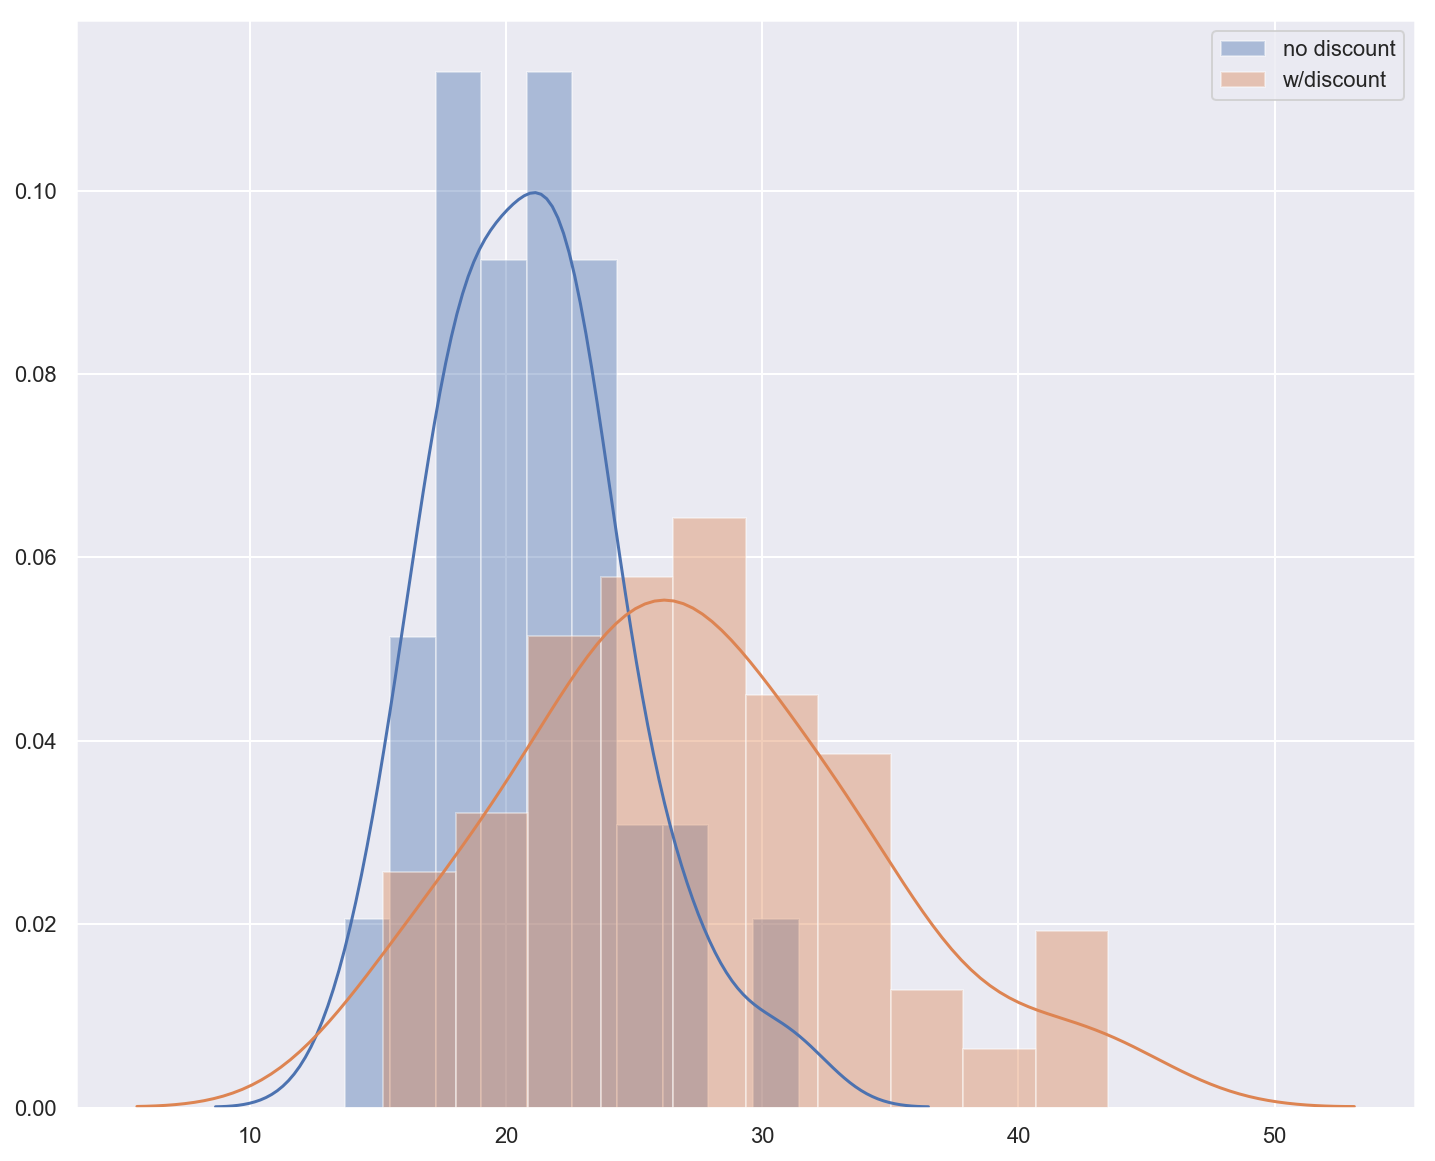

In [286]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(nodiscount_sample, bins=10, label='no discount') # Blue distribution
sns.distplot(withdiscount_sample, bins=10, label='w/discount') # Green distribution
plt.legend()

In [287]:
stats.ttest_ind(nodiscount_sample, withdiscount_sample)

Ttest_indResult(statistic=-5.9235035435911065, pvalue=3.8050332691873425e-08)

Null Hypothesis is easily rejected.  We now need to look into how each level of discount differs from no discount
## Extension

### 5% Discount

In [322]:
nodiscount_df_2 = pd.read_sql_query("""
Select *, avg(Quantity) avg_quant, count(*) data_points from OrderDetail where Discount = 0 group by ProductId order by ProductId
""", engine)
nodiscount_df_2 = nodiscount_df_2[nodiscount_df_2.data_points>1] #9,15,37, 48
nodiscount_df_2

2019-07-05 01:17:59,073 INFO sqlalchemy.engine.base.Engine 
Select *, avg(Quantity) avg_quant, count(*) data_points from OrderDetail where Discount = 0 group by ProductId order by ProductId



INFO:sqlalchemy.engine.base.Engine:
Select *, avg(Quantity) avg_quant, count(*) data_points from OrderDetail where Discount = 0 group by ProductId order by ProductId



2019-07-05 01:17:59,074 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quant,data_points
0,10294/1,10294,1,14.4,18,0.0,17.772727,22
1,10255/2,10255,2,15.2,20,0.0,21.473684,19
2,10289/3,10289,3,8.0,30,0.0,28.800000,10
3,10309/4,10309,4,17.6,20,0.0,17.200000,10
4,10290/5,10290,5,17.0,20,0.0,29.333333,6
5,10309/6,10309,6,20.0,30,0.0,26.750000,8
6,10262/7,10262,7,24.0,15,0.0,29.904762,21
7,10345/8,10345,8,32.0,70,0.0,30.000000,8
8,10693/9,10693,9,97.0,6,0.0,4.500000,2
9,10276/10,10276,10,24.8,15,0.0,19.454545,22


In [323]:
withdiscount_df_5 = pd.read_sql_query("""
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.05 group by ProductId order by ProductId
""", engine)
withdiscount_df_5 = withdiscount_df_5[withdiscount_df_5.data_points>1]
withdiscount_df_5

2019-07-05 01:18:37,578 INFO sqlalchemy.engine.base.Engine 
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.05 group by ProductId order by ProductId



INFO:sqlalchemy.engine.base.Engine:
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.05 group by ProductId order by ProductId



2019-07-05 01:18:37,580 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quanty,data_points
1,10632/2,10632,2,19.00,30,0.05,16.666667,3
3,10871/6,10871,6,25.00,50,0.05,33.000000,2
4,10459/7,10459,7,24.00,16,0.05,13.000000,4
5,10273/10,10273,10,24.80,24,0.05,20.000000,3
6,10542/11,10542,11,21.00,15,0.05,15.000000,2
7,10266/12,10266,12,30.40,12,0.05,11.333333,3
8,10894/13,10894,13,6.00,28,0.05,19.000000,2
10,10500/15,10500,15,15.50,12,0.05,18.500000,2
11,10359/16,10359,16,13.90,56,0.05,26.166667,6
12,10339/17,10339,17,31.20,70,0.05,26.000000,5


In [324]:
samp_no_discount_5test = np.array(nodiscount_df_2[nodiscount_df_2.ProductId.isin(withdiscount_df_5['ProductId'])]['avg_quant'])

In [325]:
samp_yes_discount_5test = np.array(withdiscount_df_5['avg_quanty'])

In [326]:
len(samp_no_discount_5test), len(samp_yes_discount_5test)

(45, 45)

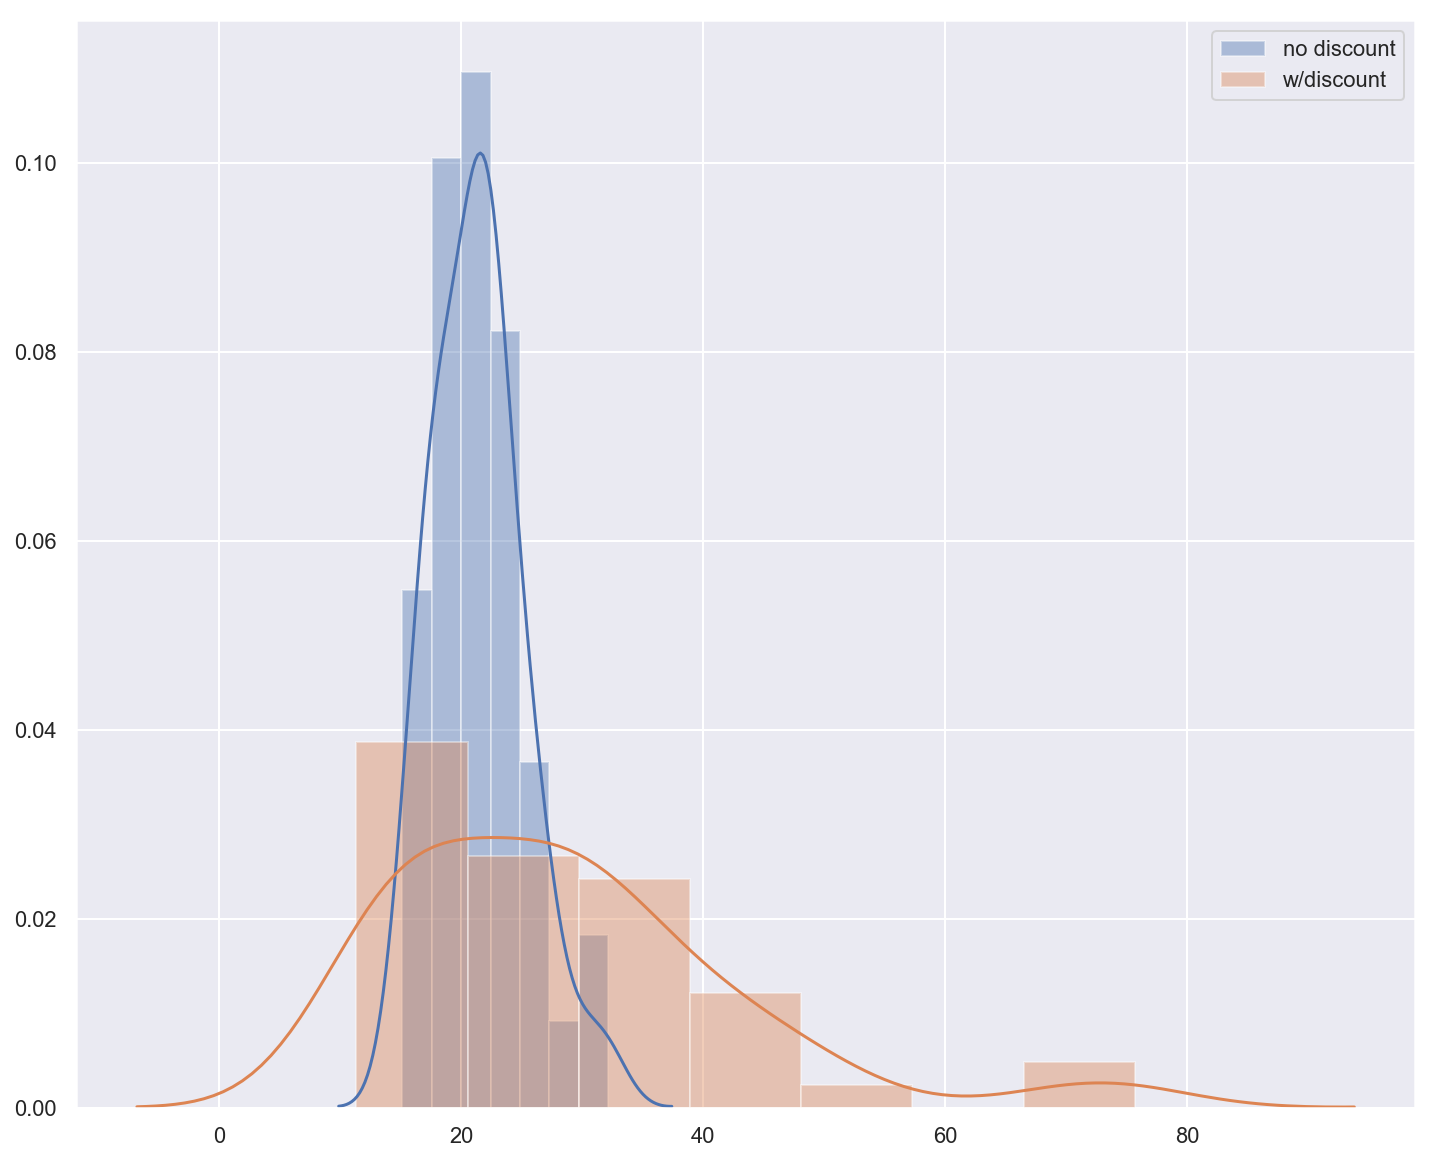

In [327]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(samp_no_discount_5test, label='no discount') # Blue distribution
sns.distplot(samp_yes_discount_5test, label='w/discount') # Green distribution
plt.legend()

In [328]:
stats.ttest_ind(samp_no_discount_5test, samp_yes_discount_5test)

Ttest_indResult(statistic=-3.1676880649096923, pvalue=0.0021127623086219884)

### 10% Discount

In [331]:
withdiscount_df_10 = pd.read_sql_query("""
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.10 group by ProductId order by ProductId
""", engine)
withdiscount_df_10 = withdiscount_df_10[withdiscount_df_10.data_points>1]
withdiscount_df_10 = withdiscount_df_10.drop(withdiscount_df_10[withdiscount_df_10.ProductId==48].index)
withdiscount_df_10

2019-07-05 01:23:14,179 INFO sqlalchemy.engine.base.Engine 
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.10 group by ProductId order by ProductId



INFO:sqlalchemy.engine.base.Engine:
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.10 group by ProductId order by ProductId



2019-07-05 01:23:14,182 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quanty,data_points
2,10485/3,10485,3,8.00,20,0.1,20.000000,2
3,10336/4,10336,4,17.60,18,0.1,22.500000,4
8,10688/10,10688,10,31.00,18,0.1,19.000000,2
9,10535/11,10535,11,21.00,50,0.1,40.000000,3
10,10291/13,10291,13,4.80,20,0.1,12.500000,4
11,10412/14,10412,14,18.60,20,0.1,11.500000,2
12,10572/16,10572,16,17.45,12,0.1,27.000000,4
13,10346/17,10346,17,31.20,36,0.1,36.500000,4
14,10305/18,10305,18,50.00,25,0.1,15.500000,4
15,10446/19,10446,19,7.30,12,0.1,19.000000,3


In [332]:
samp_no_discount_10test = np.array(nodiscount_df_2[nodiscount_df_2.ProductId.isin(withdiscount_df_10['ProductId'])]['avg_quant'])
samp_yes_discount_10test = np.array(withdiscount_df_10['avg_quanty'])
len(samp_no_discount_10test), len(samp_yes_discount_10test), samp_no_discount_10test.mean(), samp_yes_discount_10test.mean()

(45, 45, 21.078410582551165, 24.54216931216931)

In [333]:
stats.ttest_ind(samp_no_discount_10test, samp_yes_discount_10test)

Ttest_indResult(statistic=-2.002917556304259, pvalue=0.048263623633464536)

### 15% Discount

In [335]:
withdiscount_df_15 = pd.read_sql_query("""
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.15 group by ProductId order by ProductId
""", engine)
withdiscount_df_15 = withdiscount_df_15[withdiscount_df_15.data_points>1]
withdiscount_df_15 = withdiscount_df_15.drop(withdiscount_df_15[withdiscount_df_15.ProductId==48].index)
withdiscount_df_15

2019-07-05 01:25:05,143 INFO sqlalchemy.engine.base.Engine 
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.15 group by ProductId order by ProductId



INFO:sqlalchemy.engine.base.Engine:
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.15 group by ProductId order by ProductId



2019-07-05 01:25:05,146 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quanty,data_points
0,10348/1,10348,1,14.40,15,0.15,19.600000,5
1,10440/2,10440,2,15.20,45,0.15,25.000000,5
3,10511/7,10511,7,30.00,50,0.15,26.500000,2
4,10511/8,10511,8,40.00,10,0.15,15.000000,2
6,10664/10,10664,10,31.00,24,0.15,49.333333,3
8,10543/12,10543,12,38.00,30,0.15,33.000000,2
9,10633/13,10633,13,6.00,13,0.15,44.800000,5
10,10571/14,10571,14,23.25,11,0.15,8.000000,2
11,10287/16,10287,16,13.90,40,0.15,33.000000,8
14,10397/21,10397,21,8.00,10,0.15,30.000000,3


In [336]:
samp_no_discount_15test = np.array(nodiscount_df_2[nodiscount_df_2.ProductId.isin(withdiscount_df_15['ProductId'])]['avg_quant'])
samp_yes_discount_15test = np.array(withdiscount_df_15['avg_quanty'])
len(samp_no_discount_15test), len(samp_yes_discount_15test), samp_no_discount_15test.mean(), samp_yes_discount_15test.mean()

(40, 40, 21.818650066401762, 26.91875)

In [337]:
stats.ttest_ind(samp_no_discount_15test, samp_yes_discount_15test)

Ttest_indResult(statistic=-2.232076426076059, pvalue=0.028479272373399957)

### 20%

In [338]:
withdiscount_df_20 = pd.read_sql_query("""
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.20 group by ProductId order by ProductId
""", engine)
withdiscount_df_20 = withdiscount_df_20[withdiscount_df_20.data_points>1]
withdiscount_df_20

2019-07-05 01:25:35,611 INFO sqlalchemy.engine.base.Engine 
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.20 group by ProductId order by ProductId



INFO:sqlalchemy.engine.base.Engine:
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.20 group by ProductId order by ProductId



2019-07-05 01:25:35,614 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quanty,data_points
0,10285/1,10285,1,14.40,45,0.2,42.500000,4
1,10258/2,10258,2,15.20,50,0.2,24.700000,10
2,10464/4,10464,4,17.60,16,0.2,18.000000,2
3,10258/5,10258,5,17.00,65,0.2,38.500000,2
6,10357/10,10357,10,24.80,30,0.2,25.000000,2
7,10327/11,10327,11,16.80,50,0.2,22.666667,3
10,10555/14,10555,14,23.25,30,0.2,22.500000,2
12,10430/17,10430,17,31.20,45,0.2,37.500000,2
13,10332/18,10332,18,50.00,40,0.2,34.000000,4
14,10438/19,10438,19,7.30,15,0.2,20.666667,3


In [340]:
samp_no_discount_20test = np.array(nodiscount_df_2[nodiscount_df_2.ProductId.isin(withdiscount_df_20['ProductId'])]['avg_quant'])
samp_yes_discount_20test = np.array(withdiscount_df_20['avg_quanty'])
len(samp_no_discount_20test), len(samp_yes_discount_20test), samp_no_discount_20test.mean(), samp_yes_discount_20test.mean()

(45, 45, 21.014446021044616, 28.063333333333333)

In [341]:
stats.ttest_ind(samp_no_discount_20test, samp_yes_discount_20test)

Ttest_indResult(statistic=-4.02751597257798, pvalue=0.00011926263718331566)

### 25%

In [342]:
withdiscount_df_25 = pd.read_sql_query("""
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.25 group by ProductId order by ProductId
""", engine)
withdiscount_df_25 = withdiscount_df_25[withdiscount_df_25.data_points>1]
withdiscount_df_25 = withdiscount_df_25.drop(withdiscount_df_25[withdiscount_df_25.ProductId==48].index)
withdiscount_df_25

2019-07-05 01:33:17,902 INFO sqlalchemy.engine.base.Engine 
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.25 group by ProductId order by ProductId



INFO:sqlalchemy.engine.base.Engine:
Select *, avg(Quantity) avg_quanty, count(*) data_points from OrderDetail where Discount = 0.25 group by ProductId order by ProductId



2019-07-05 01:33:17,904 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,avg_quanty,data_points
0,10646/1,10646,1,18.00,15,0.25,27.800000,5
1,10393/2,10393,2,15.20,25,0.25,34.500000,6
2,10913/4,10913,4,22.00,30,0.25,27.500000,2
8,10489/11,10489,11,16.80,15,0.25,18.750000,4
11,10393/14,10393,14,18.60,42,0.25,31.000000,2
12,10263/16,10263,16,13.90,60,0.25,46.666667,3
13,10279/17,10279,17,31.20,15,0.25,33.400000,5
14,10719/18,10719,18,62.50,12,0.25,13.666667,3
15,10651/19,10651,19,9.20,12,0.25,9.666667,3
17,10461/21,10461,21,8.00,40,0.25,30.500000,2


In [343]:
samp_no_discount_25test = np.array(nodiscount_df_2[nodiscount_df_2.ProductId.isin(withdiscount_df_25['ProductId'])]['avg_quant'])
samp_yes_discount_25test = np.array(withdiscount_df_25['avg_quanty'])
len(samp_no_discount_25test), len(samp_yes_discount_25test), samp_no_discount_25test.mean(), samp_yes_discount_25test.mean()

(38, 38, 20.94664847927541, 28.31472431077694)

In [344]:
stats.ttest_ind(samp_no_discount_25test, samp_yes_discount_25test)

Ttest_indResult(statistic=-3.7506491864303517, pvalue=0.000347867397738462)